# **Fashion-MNIST**
[https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

Download this data set through PyTorch's *torchvision.datasets* package.

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.optim as optim
import time

batch_size = 128
num_epochs = 5
# Note not to flip two transform types, otherwise data type would be wrong.
transform = transforms.Compose([transforms.ToTensor(),
                              ]) 

mnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [2]:
len(mnist_train), len(mnist_test)
# print(mnist_train.size, mnist_test.size)

(60000, 10000)

We can access any example by square brackets [ ] , and next, we will get the image and
label of the rst example.

In [3]:
feature, label = mnist_train[0]
print(feature.shape, feature.dtype)
print(label, type(label))

torch.Size([1, 28, 28]) torch.float32
9 <class 'int'>


In [4]:
def get_fashion_mnist_labels(labels):
    print(labels)
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_fashion_mnist(images, labels):
    # Here _ means that we ignore (not use) variables.
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

torch.Size([10, 1, 28, 28])
tensor([8, 9, 8, 2, 9, 6, 4, 8, 8, 2])
tensor([8, 9, 8, 2, 9, 6, 4, 8, 8, 2])


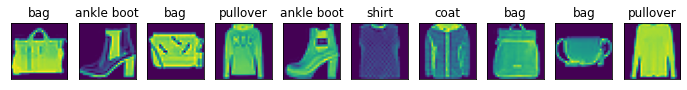

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=10,
    shuffle=True, num_workers=0)

for X,y in train_loader:
    print(X.shape)
    print (y)
    show_fashion_mnist(X, get_fashion_mnist_labels(y))
    break
# X, y = train_loader[0:9]


In [7]:
batch_size = 256
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=10,
    shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=10,
    shuffle=True, num_workers=0)

Let's look at the time it takes to read the training data.

In [10]:
start = time.time()
for X, y in train_loader:
    continue
print('%.2f sec' % (time.time() - start))

4.58 sec
